In [1]:
import tensorflow as tf

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Hyper parameters
learning_rate = 0.00075
epochs = 500

In [4]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

#weights and biases construction
# Set model weights
W = tf.Variable(randn(), name="weight")
b = tf.Variable(randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [6]:
init = tf.global_variables_initializer()
#gradient descent
grad = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = grad.minimize(cost)

Epoch: 50 cost: 0.35926846
Epoch: 100 cost: 0.11238301
Epoch: 150 cost: 0.10397696
Epoch: 200 cost: 0.1034843
Epoch: 250 cost: 0.103239544
Epoch: 300 cost: 0.103001565
Epoch: 350 cost: 0.10276518
Epoch: 400 cost: 0.10253083
Epoch: 450 cost: 0.10229857
Epoch: 500 cost: 0.102068424

 Optimization Finished!

Training cost= 0.102068424 W: 0.34129858 b: 0.16149394 



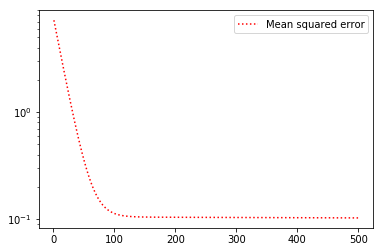

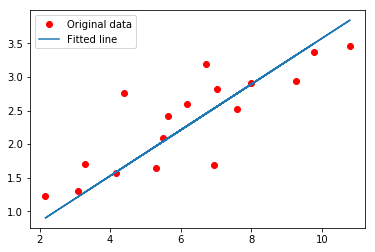

Testing... (Mean square loss Comparison)
Testing cost= 0.08803356
Absolute mean square loss difference: 0.014034867


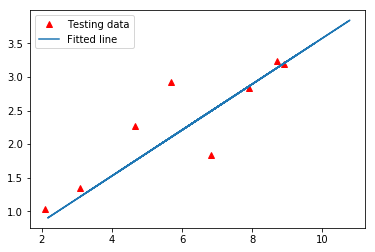

In [23]:
costl=[]
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch: " + str(epoch+1) + " cost: " + str(c))
        ct =  sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        costl.append(ct)

    print("\n Optimization Finished!\n")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W:", sess.run(W), "b:", sess.run(b), '\n')

    #erro graph
    plt.semilogy([(i+1) for i in range(epochs)], costl,'r:',label='Mean squared error')
    plt.legend()
    plt.show()
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))
    
    
    plt.plot(test_X, test_Y, 'r^', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()

plt.show()